Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 117
         Function evaluations: 1727
         Gradient evaluations: 157


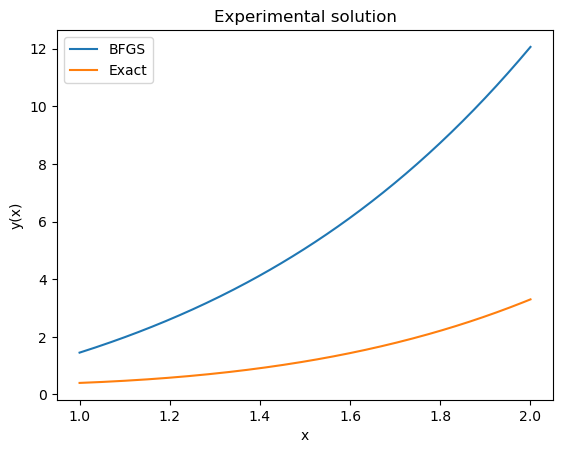

迭代次数： 117


In [68]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 微分方程
def ode_system(x, y, ANNnetwork, params):    
    dydt = [ANNnetwork(np.array([[x]]), params)[0][0] - y[0] / x]    
    return dydt 
# 初始条件
y0 = [0.4]
# 定义人工神经网络结构
def ANNnetwork(x, params): 
# 将omega,miu,theta分离   
    w1 = params[:3].reshape((1, 3))    
    b1 = params[3:6]    
    w2 = params[6:9].reshape((3, 1))    
    b2 = params[9]  
# 将神经网络进行前向传播   
    z1 = x.dot(w1) + b1   
    a1 = np.tanh(z1)    
    z2 = a1.dot(w2) + b2   
    return z2 
# 定义用于最优化方法的损失函数
def loss(params):    
    sol = solve_ivp(ode_system, [1, 2], y0, t_eval=np.linspace(1, 2, 10), args=(ANNnetwork, params))    
    y_pred = sol.y[0]      
    ytrue = lambda x: x**4 / 5 + 1/(5*x)     
    MSE = np.mean((y_pred - ytrue(sol.t))**2) 
    return MSE 

initial_params = [1,1,1,1,1,1,1,1,1,1]
result = minimize(loss, initial_params, method='BFGS', options={'disp': True}) 
paramsb = result.x 

#代码可视化
X = np.linspace(1,2,200)
y_pred = [ANNnetwork(np.array([[x]]), paramsb)[0][0] for x in X]
ytrue = [x**4/5 + 1/(5*x) for x in X] 
plt.plot(X, y_pred, label='BFGS')
plt.plot(X, ytrue, label='Exact')
plt.title('Experimental solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.show() 
print("迭代次数：", result.nit)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 60
         Function evaluations: 6635


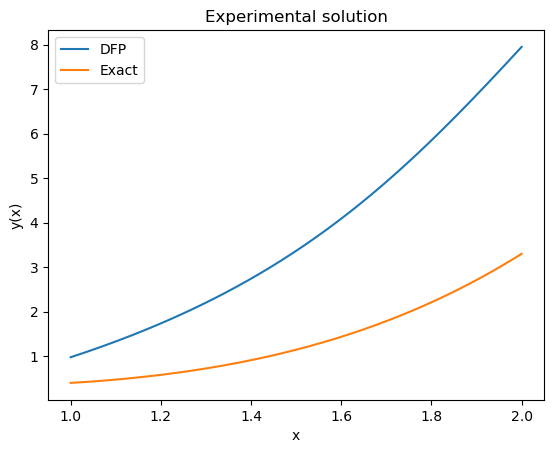

迭代次数： 60


In [64]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 微分方程
def ode_system(x, y, ANNnetwork, params):    
    dydt = [ANNnetwork(np.array([[x]]), params)[0][0] - y[0] / x]    
    return dydt 
# 初始条件
y0 = [0.4]
# 定义人工神经网络结构
def ANNnetwork(x, params): 
# 将omega,miu,theta分离   
    w1 = params[:3].reshape((1, 3))    
    b1 = params[3:6]    
    w2 = params[6:9].reshape((3, 1))    
    b2 = params[9]  
# 将神经网络进行前向传播   
    z1 = x.dot(w1) + b1   
    a1 = np.tanh(z1)    
    z2 = a1.dot(w2) + b2   
    return z2 
# 定义用于最优化方法的损失函数
def loss(params):    
    sol = solve_ivp(ode_system, [1, 2], y0, t_eval=np.linspace(1, 2, 10), args=(ANNnetwork, params))    
    y_pred = sol.y[0]      
    ytrue = lambda x: x**4 / 5 + 1/(5*x)     
    MSE = np.mean((y_pred - ytrue(sol.t))**2) 
    return MSE 

initial_params = [1,1,1,1,1,1,1,1,1,1]
result = minimize(loss, initial_params, method='Powell', options={'disp': True}) 
paramsb = result.x 

#代码可视化
X = np.linspace(1,2,200)
y_pred = [ANNnetwork(np.array([[x]]), paramsb)[0][0] for x in X]
ytrue = [x**4/5 + 1/(5*x) for x in X] 
plt.plot(X, y_pred, label='DFP')
plt.plot(X, ytrue, label='Exact')
plt.title('Experimental solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.show() 
print("迭代次数：", result.nit)

与预期精确解差别较大。